## CA 2, LLMs Spring 2024

- **Name:** Melika Noubakhtian
- **Student ID:** 4021305965008

---
#### Your submission should be named using the following format: `CA2_LASTNAME_STUDENTID_gpt.ipynb`.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
sepehr.kamahi@ut.ac.ir

---

## Section 1: Generate a Single Sentence (20 points)
Write a prompt that has ten tokens according to the GPT-2 tokenizer. (2 points)

In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np
import time
model_name = "gpt2"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [3]:
prompt = "Generate a fantasy story about dragons and wizards."
# Tokenize the prompt
inputs = tokenizer(prompt)

# Extract tokens, input_ids, and attention_mask
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"])
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]

In [4]:
print("Tokens:", tokens)
print("Input IDs:", input_ids)
print("Attention Mask:", attention_mask)

Tokens: ['Gener', 'ate', 'Ġa', 'Ġfantasy', 'Ġstory', 'Ġabout', 'Ġdragons', 'Ġand', 'Ġwizards', '.']
Input IDs: [8645, 378, 257, 8842, 1621, 546, 20308, 290, 34836, 13]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### a) Load the model to the GPU
Use the prompt you wrote and generate 190 new tokens, appending each new token to the previous sequence at each step. Measure the time of generating each new token. You CAN ONLY use PyTorch for decoding; use greedy decoding. You will get a 200-token sequence at the end, so print the sentence.

Plot the time needed for generating each new token. Use torch.cuda.max_memory_allocated and plot the memory used at each step in MB. At each step, by giving the input_ids to the model as the labels argument, the loss will be calculated for you automatically. Plot the loss at all steps.

Explain the patterns you see in the plots. (8 points)

**Explanation:**
At first, let's talk about generation times. There is a big difference between the generation time of the first token and the generation time of other tokens. The model aapproximately spent 2 seconds to generate the first token while this time for other tokens was close to 0. There are some reasons behind this:

1. **Lack of Context:** The model doesn't have any preceding information to base its prediction on. Unlike subsequent tokens where it can consider the previously generated text, the first token requires the model to analyze the entire vocabulary and predict the most likely starting point based on its internal parameters and training data. This initial step requires more computational power.

2. **Initialization Overhead:**  Autoregressive models often use hidden states that capture the context as the generation progresses. These hidden states need to be initialized for the first token, which can involve additional computations compared to simply predicting the next token in the sequence.

3. **Potential for Exploration:** For some models, generating the first token might involve more exploration of the probability space.  The model might consider a wider range of possibilities before settling on the most likely starting point. This exploration takes extra time compared to subsequent tokens where the model can leverage the built-up context to narrow down its options.


Now It is time for Memory Usage. It is obvious that the memory usage has increased as we went further to generate more tokens. Overall, we know that to generate a longer sequence, the model should process more tokens and store hidden states and attentions for them that need more memeory. In summary. it happens becuase:

* The model needs to consider all previously generated tokens to predict the next one. As the sequence grows, this historical context keeps expanding, requiring more memory to store.

* The model performs various calculations during generation, like attention mechanisms that analyze relationships between tokens. These intermediate results might be stored temporarily, especially for longer sequences, leading to increased memory usage.  


Finally let's consider loss. For the initial tokens, the loss has higher values and as we go further to generate more tokens, this time decrease. But why this happens? Early tokens have higher loss because the model is unsure where to begin. As it generates more text, it builds confidence (probability) and accuracy, leading to lower loss. Imagine navigating a maze - the first steps involve exploring many paths (high loss), but with each turn, you get closer to the exit (lower loss).

Generated Text: Generate a fantasy story about dragons and wizards.

The story is about a young boy named Harry who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young


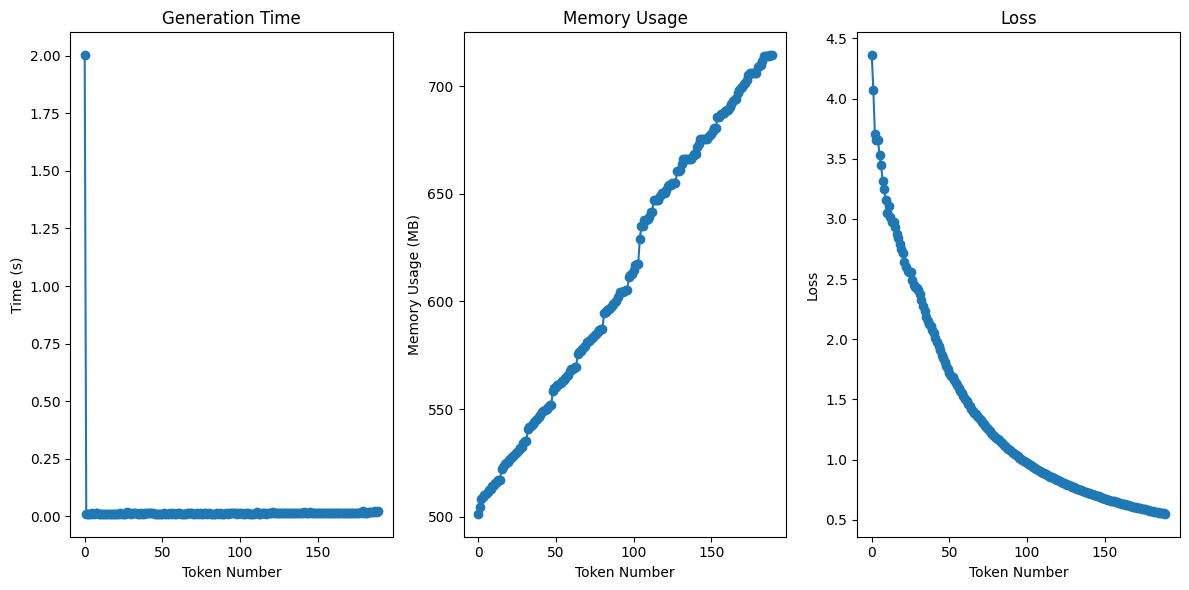

In [5]:
# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].to(device)

# Lists to store data for plotting
generation_times = []
memory_usage = []
losses = []

# Generating new tokens
with torch.no_grad():
    for i in range(190):
        start_time = time.time()
        outputs = model(input_ids=input_ids, labels=input_ids)
        loss = outputs.loss.item()
        input_ids = torch.cat([input_ids, torch.argmax(outputs.logits[:, -1:], dim=-1)], dim=-1).to(device)
        generation_time = time.time() - start_time
        generation_times.append(generation_time)
        memory_usage.append(torch.cuda.max_memory_allocated() / 1024 ** 2)  # Convert bytes to MB
        losses.append(loss)

# Decode the generated tokens
generated_text = tokenizer.decode(input_ids.squeeze().tolist())
print("Generated Text:", generated_text)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(generation_times, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Time (s)')
plt.title('Generation Time')

plt.subplot(1, 3, 2)
plt.plot(memory_usage, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage')

plt.subplot(1, 3, 3)
plt.plot(losses, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Loss')
plt.title('Loss')

plt.tight_layout()
plt.show()


### b) Use past_key_values
Give the past_key_values to the model during generation, and repeat all of the above steps; then, compare the results. (10 points)

**Explanation:** Before interpreting and comparing results, let's talk about `past_key_values` and what they do. `past_key_values` Contains precomputed hidden-states (key and values in the attention blocks) as computed by the model. It can be used to speed up sequential decoding. The input_ids which have their past given to this model should not be passed as input_ids as they have already been computed. To use them, we should set `use_cache=TRUE` and then model will return `past_key_value` and can be used to speed up decoding.

About generation time, we see the same pattern as the previous case, the time for the first token is higher than others.  but camparing with the last case, the time is less. It can be becuase of the `past_key_value` that speeds uo this process.

In reference to `past_key_values`, our anticipation is for reduced memory usage in this scenario. Unlike the prior case, where memory consumption fluctuated, here it remains constant without any observable upward trend. This stability is attributed to precomputed hidden states and attentions, eliminating the need for recalculations at each step and consequently preventing significant memory escalation.

In [6]:
# Tokenize the prompt
inputs = tokenizer(prompt, return_tensors="pt")
input_ids = inputs["input_ids"].to(device)

# Lists to store data for plotting
generation_times = []
memory_usage = []
losses = []
generated_text = prompt

# Generating new tokens
with torch.no_grad():
    past_key_values = None
    for i in range(190):
        start_time = time.time()
        if not past_key_values is None:
            outputs = model(input_ids=input_ids, labels=input_ids, use_cache=True, past_key_values=past_key_values)
        else:
            outputs = model(input_ids=input_ids, labels=input_ids, use_cache=True)
        input_ids = torch.cat([torch.argmax(outputs.logits[:, -1:], dim=-1)], dim=-1).to(device)
        generation_time = time.time() - start_time
        generation_times.append(generation_time)
        generated_text += tokenizer.decode(input_ids.squeeze().tolist())
        past_key_values = outputs.past_key_values
        memory_usage.append(torch.cuda.max_memory_allocated() / 1024 ** 2)  # Convert bytes to MB

# Decode the generated tokens
print("Generated Text:", generated_text)


Generated Text: Generate a fantasy story about dragons and wizards.

The story is about a young boy named Harry who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young boy who is a wizard and a wizarding wizard. He is a young


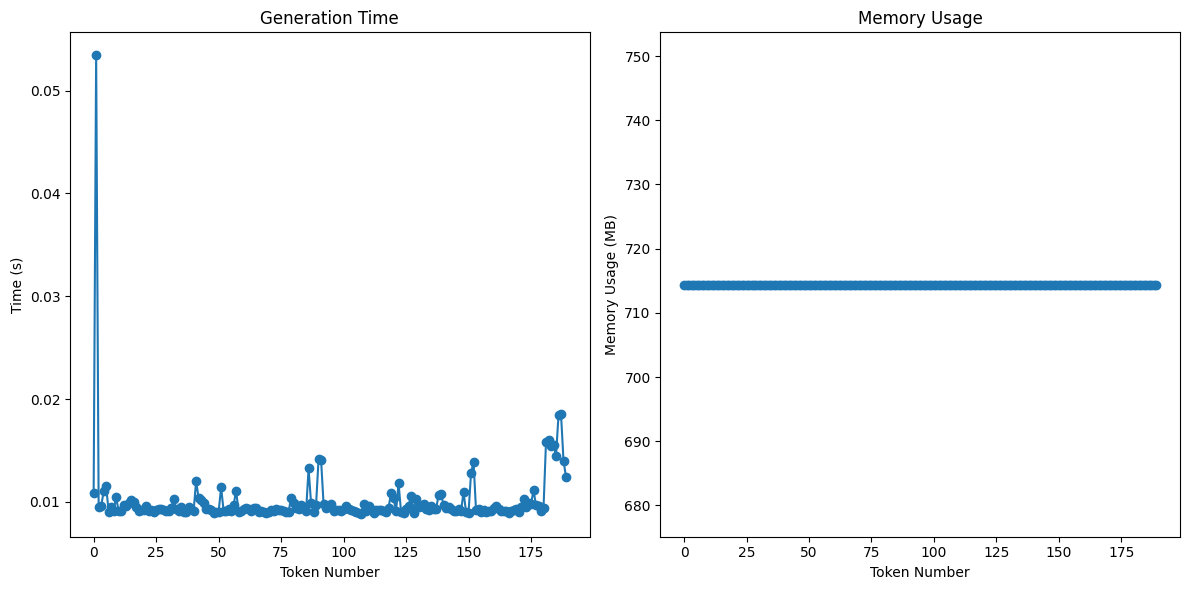

In [7]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(generation_times, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Time (s)')
plt.title('Generation Time')

plt.subplot(1, 2, 2)
plt.plot(memory_usage, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage')

plt.tight_layout()
plt.show()

## Section 2: Batch Generation (25 points)
Write 4 prompts (a list of 4 sentences). All the sentences you write should have different lengths. Print the input_ids and attention_mask, and explain why the attention_masks are the way they are. When you tokenize, use left-side padding. Explain why left-side padding is preferable during inference. What is the padding token ID in this particular tokenizer?
(10 points)

**Explanation:**

LLMs are decoder-only architectures, meaning they continue to iterate on your input prompt. If your inputs do not have the same length, they need to be padded. Since LLMs are not trained to continue from pad tokens, your input needs to be left-padded. Because of this, left padding is preferable.

According to the results, the token ID of padding token is 50256.

In [3]:
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

prompts = [
    "The cat sat on the mat.",
    "I wonder what for dinner tonight?",
    "The weather today is beautiful, isn't it?",
    "Let's go for a walk in the park this afternoon."
]

inputs = tokenizer(prompts, padding=True, return_tensors="pt")
inputs

{'input_ids': tensor([[50256, 50256, 50256, 50256, 50256,   464,  3797,  3332,   319,   262,
          2603,    13],
        [50256, 50256, 50256, 50256, 50256,    40,  4240,   644,   329,  8073,
          9975,    30],
        [50256, 50256,   464,  6193,  1909,   318,  4950,    11,  2125,   470,
           340,    30],
        [ 5756,   338,   467,   329,   257,  2513,   287,   262,  3952,   428,
          6672,    13]]), 'attention_mask': tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

For batch decoding, you should also give position_ids to the model. You should create the position_ids yourself. Explain what position_ids are and how they help. Print the position_ids of your batch prompt. Repeat Section 1, Subsection b, but this time, use the prompt in batch form and give position_ids to the model. Plot the memory needed at each step. Plot the time needed at each step, also plot number of tokens generated per second (a.k.a. throughput). Compare the throughput and memory usage of batch generation with single sentence generation. (15 points)

**Explanation:**

Contrary to RNNs that have the position of each token embedded within them, transformers are unaware of the position of each token. Therefore, the position IDs are used by the model to identify each token’s position in the list of tokens.

They are an optional parameter. If no position_ids are passed to the model, the IDs are automatically created as absolute positional embeddings.


As you see `position_ids`, they show the position of each token in the sequence and this number indicates their position:

In [4]:
# Create position IDs for batch
def create_position_ids(batch_size, max_length):
    return torch.arange(max_length)[None, :].repeat(batch_size, 1).to(device)

batch_size = len(prompts)

input_ids = inputs["input_ids"].to(device)
position_ids = create_position_ids(batch_size, input_ids.shape[1])
position_ids

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

The memory usage in batch decoding is a little higher than the previous cases becuase we have multiple sentences to process.

About generation time, we observe many ups and downs in the plot. There are several reasons behind this:

**1. Variable Sequence Lengths:**

- In batch decoding, you process multiple prompts at once. These sentences might have different lengths. When generating the next token for a shorter sentence in the batch, the model might finish processing it earlier compared to longer sentences. This can lead to idle time waiting for other sentences to be completed, causing fluctuations in the overall time per token.


**2. Batch Size and Hardware Utilization:**

- Batch size can impact time per token. While larger batch sizes can improve overall throughput (tokens generated per second), they also require the model to process more information simultaneously. This might lead to some fluctuations in processing time as the GPU or TPU manages different parts of the batch.

**3. Variable Difficulty of Predictions:**

- Not all tokens are equally easy for the model to predict. Some token positions might have a clearer context based on previous words, while others might be more ambiguous. This can lead to slight variations in processing time as the model needs to consider different possibilities with varying degrees of complexity.



The variability in throughput can be attributed to the same factors affecting generation time. Since generation time directly impacts throughput, fluctuations in the time taken to generate each token can lead to varying throughput rates. Although the number of tokens generated remains constant, the time required for each step varies. Notably, tokens with longer generation times, such as the first token, often result in lower throughput values.

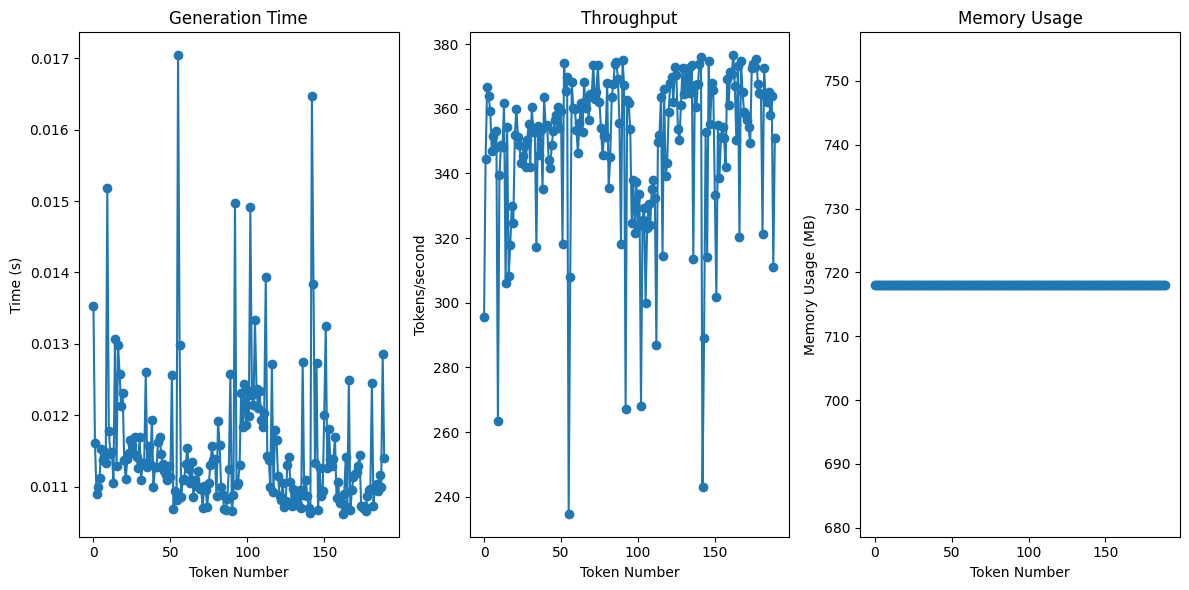

In [15]:
# Create position IDs for batch
def create_position_ids(batch_size, max_length):
    return torch.arange(max_length)[None, :].repeat(batch_size, 1).to(device)

batch_size = len(prompts)

# Tokenize the batch prompt
input_ids = inputs["input_ids"].to(device)
attention_mask = inputs["attention_mask"].to(device)
position_ids = create_position_ids(batch_size, input_ids.shape[1])
past_key_values = None

# Lists to store data for plotting
generation_times = []
throughput = []
memory_usage = []

# Generating new tokens
with torch.no_grad():
    for i in range(190):
        start_time = time.time()
        if not past_key_values is None:
            outputs = model(input_ids=input_ids, use_cache=True, past_key_values=past_key_values, position_ids=position_ids)
        else:
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, position_ids=position_ids, use_cache=True)
        input_ids = torch.cat([torch.argmax(outputs.logits[:, -1:], dim=-1)], dim=-1)
        position_ids = create_position_ids(batch_size, input_ids.shape[1])
        past_key_values = outputs.past_key_values
        generation_time = time.time() - start_time
        generation_times.append(generation_time)
        throughput.append(batch_size / generation_time)  # Tokens generated per second
        memory_usage.append(torch.cuda.max_memory_allocated() / 1024 ** 2)  # Convert bytes to MB

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(generation_times, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Time (s)')
plt.title('Generation Time')

plt.subplot(1, 3, 2)
plt.plot(throughput, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Tokens/second')
plt.title('Throughput')

plt.subplot(1, 3, 3)
plt.plot(memory_usage, marker='o')
plt.xlabel('Token Number')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage')

plt.tight_layout()
plt.show()
